<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата <br>  <br> Варка распределений </center>
---------------

In [1]:
library("ggplot2")  # Пакет для красивых графиков 
library("reshape2")

library("grid")     # Пакет для субплотов

# Эти пакеты для Rstudio не очень то и нужны 
# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=6, repr.plot.height=3)

# 1. Квантильное преобразование 


#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет варить из равномерного распределения другие 

- Применимо невсегда, напрмер для нормального распределения используют другие алгоритмы __(Почему?)__

<center>
<img src="quant.png" height="200"> 
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение. Снова математика позволила нам быть клёвыми. Приятно. 

## Задание 1

Как же мы можем сварить из равномерной случайной величины, $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$?

На самом деле легко! Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так: 

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$


In [1]:
# Попробуйте сами!

Теперь попробуем в обратную сторону. 

In [2]:
# Получите из экспоненциальной величины равномерную

## Задание 2

Аналогично можно попробовать получить какую-нибудь нестандартную случайно величину с заранее известной функцией распределения. Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

$$ 
F^{-1}(x) = x^{\tfrac{1}{7}}
$$

In [ ]:
# Ваш код

Ясное дело, что работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

# 2. Распределения из матстата

В теории вероятностей [огромное количество распределений!](http://www.math.wm.edu/~leemis/2008amstat.pdf) Они все взаимосвязаны между собой в огромный клубок. 

Мы довольно часто будем иметь дело с несколькими распределениями, которые на первый взгляд могут показаться довольно экстраординарными. Давайте познакомимся с ними и поймём зачем люди придумали их. 

## 2.1 Нормальное распределение 

Уже знакомы. Часто встречается на практике из-за ЦПТ. Давайте просто нарисуем плотности нормального распределения при разных $\mu$ и $\sigma$ и на этом успокоимся. 

In [27]:
x = seq(-8, 8, 0.1)

df = data.frame(x)

mu = c(0, 0, 0, 2, 2)
sigma = c(1, 2, 3, 3, 1)

for(i in 1:length(mu)){
    col = paste0("N(", mu[i], ", ", sigma[i], ")")
    df[col] = dnorm(x, mean=mu[i], sd=sigma[i])
}

head(df)

x,"N(0, 1)","N(0, 2)","N(0, 3)","N(2, 3)","N(2, 1)"
-8.0,5.052271e-15,6.691511e-05,0.003798662,0.0005140930,7.694599e-23
-7.9,1.118796e-14,8.162820e-05,0.004149477,0.0005741896,2.081177e-22
-7.8,2.452855e-14,9.932774e-05,0.004527656,0.0006405993,5.573000e-22
-7.7,5.324148e-14,1.205633e-04,0.004934817,0.0007138962,1.477495e-21
-7.6,1.144156e-13,1.459735e-04,0.005372619,0.0007946961,3.878112e-21
-7.5,2.434321e-13,1.762978e-04,0.005842767,0.0008836587,1.007794e-20


In [28]:
df_long = melt(df, id="x")  # конвертировать в длинный формат
head(df_long)

x,variable,value
-8.0,"N(0, 1)",5.052271e-15
-7.9,"N(0, 1)",1.118796e-14
-7.8,"N(0, 1)",2.452855e-14
-7.7,"N(0, 1)",5.324148e-14
-7.6,"N(0, 1)",1.144156e-13
-7.5,"N(0, 1)",2.434321e-13


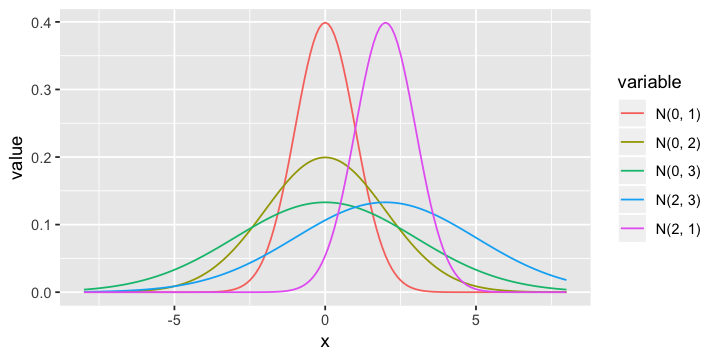

In [29]:
ggplot(data = df_long,
       aes(x=x, y=value, colour=variable)) + 
    geom_line()

__Когда такая штука встречается на практике?__   

Мы постоянно будем считать средние. Любое среднее благодаря ЦПТ имеет асимптотически нормальное распределение. Позже мы даже найдём его математическое ожидание и дисперсию и даже обобщим ЦПТ на более сложные случаи. 

## 2.2 Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково распределены. Причём нормально с параметрами $0$ и $1$. Обычно такой факт записывают следующим образом: 

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$ 

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

__Определение:__  случайная величина $Y = X_1^2 + \ldots + X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

Степень свободы это просто название для параметра распределения. Почему оно именно такое, мы обсудим позже. Сейчас давайте попробуем получить хи-квадрат из нормальной выборки. 

In [30]:
# Одна такая случайная величина с 5 степенями свободы
x = rnorm(5)
sum(x**2)

[1] 12.96561

In [33]:
n_obs = 1000
k = 5

x = rnorm(n_obs*k)
length(x)

[1] 5000

In [34]:
x = matrix(x, n_obs, k)
dim(x)

[1] 1000    5

In [35]:
x = rowSums(x**2)
length(x)

[1] 1000

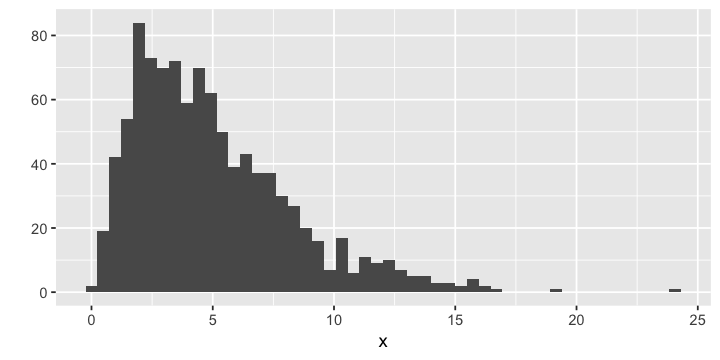

In [37]:
qplot(x, bins=50)

Внутри `R` уже есть готовая реализация $\chi^2_k$.

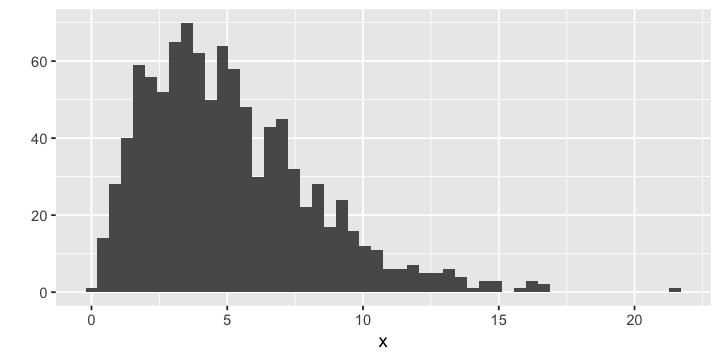

In [38]:
x = rchisq(1000, df=5)
qplot(x, bins=50)

Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. Понятное дело, что из-за квадрата, случайная величина принимает только положительные значения. 

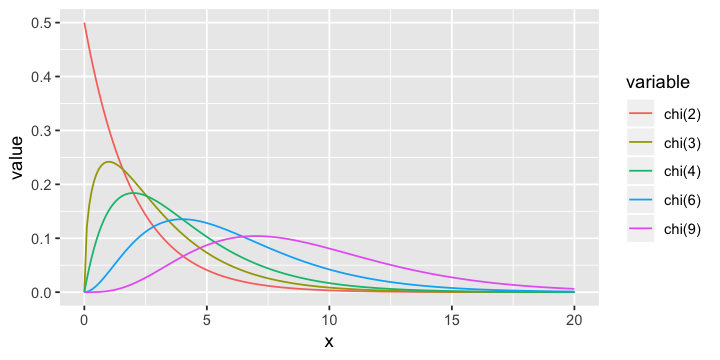

In [43]:
x = seq(0, 20, 0.1)

df = data.frame(x)

k = c(2, 3, 4, 6, 9)

for(i in 1:length(k)){
    col = paste0("chi(", k[i], ")")
    df[col] = dchisq(x, df=k[i])
}

df_long = melt(df, id="x")  # конвертировать в длинный формат

ggplot(data = df_long,
       aes(x=x, y=value, colour=variable)) + 
    geom_line()

__Когда такая штука встречается на практике?__ Когда мы на первой неделе говорили про описательные статистики, мы упоминали, что выборочную дисперсию можно считать по формуле 

$$
\hat \sigma^2 = \overline{x^2} - \overline x^2.
$$

Ели выборка пришла к нам из нормального распределения, тогда $\overline{x^2}$ будет иметь $\chi^2_n$. Если чуток поколдовать, можно убедиться, что для дисперсии тоже всплывает хи-квадрат распределение. В будущем мы это проделаем. 

## 2.3 Распределение Стьюдента

__Определение:__ Заведём ещё одну случайную величину $X_0$ со стандартным нормальным распределением. Пусть она низависима от $X_1, \ldots, X_k$. Тогда говорят, что случайная величина 

$$ Y = \frac{X_0}{\sqrt{^{\chi^2_k}/_k}} $$

имеет $t$-распределение стьюдента c $k$ степенью свободы, $Y \sim t (k)$. Снова попробуем получить это распределение из нормальной выборки. 

In [44]:
x0 = rnorm(1)

x = rnorm(5)
x = sum(x**2)/5

y = x0/sqrt(x)
y

[1] 0.2270614

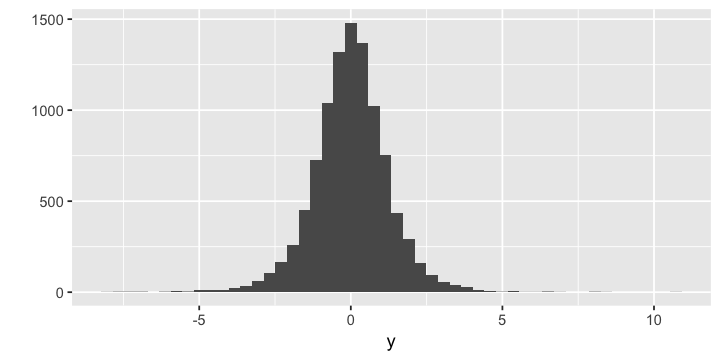

In [45]:
n_obs = 10000
k = 5

x0 = rnorm(n_obs)

x = rnorm(n_obs*k)
x = matrix(x, n_obs, k)
x = rowSums(x**2)/k

y = x0/sqrt(x)
qplot(y, bins=50)

Снова внутри `R` уже есть готовая реализация $t(k)$.

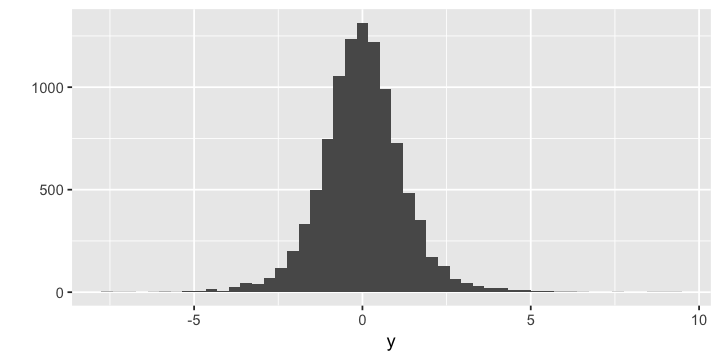

In [46]:
y = rt(n_obs, df=5)
qplot(y, bins=50)

Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. 

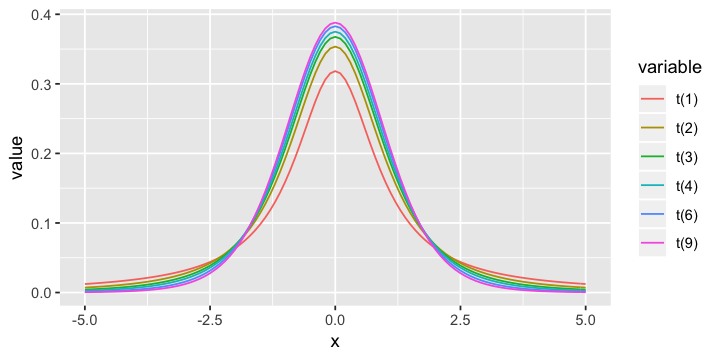

In [47]:
x = seq(-5, 5, 0.1)

df = data.frame(x)

k = c(1, 2, 3, 4, 6, 9)

for(i in 1:length(k)){
    col = paste0("t(", k[i], ")")
    df[col] = dt(x, df=k[i])
}

df_long = melt(df, id="x")  # конвертировать в длинный формат

ggplot(data = df_long,
       aes(x=x, y=value, colour=variable)) + 
    geom_line()

Важно заметить, что при росте $k$ распределение Стьюдента становится всё больше и больше похоже на нормальное. В будущем этот факт нам пригодится. 


__Когда такая штука встречается на практике?__  Довольно часто на практике будет всплывать выражение

$$
\frac{\bar x}{\sqrt{ \frac{\hat \sigma^2}{n}}}.
$$

Мы знаем, что по ЦПТ у числителя нормальное распределение, а в знаменателе как раз стоит  $\sqrt{^{\chi^2_n}/_n}$. Значит в целом выражение будет иметь распределение Стьюдента с $n-1$ степенью свободы.

## 2.4 Распределение Фишера

__Определение:__ случайная величина 

$$ Y = \frac{^{\chi^2_k}/_k}{^{\chi^2_m}/_m}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$. Сгенерируем её! 

In [48]:
k = 5
m = 10

x1 = rnorm(k)
x1 = sum(x1**2)/k

x2 = rnorm(m)
x2 = sum(x2**2)/m

y = x1/x2
y # Одна такая случайная величина (5 и 10 степеней свободы)

[1] 0.8797433

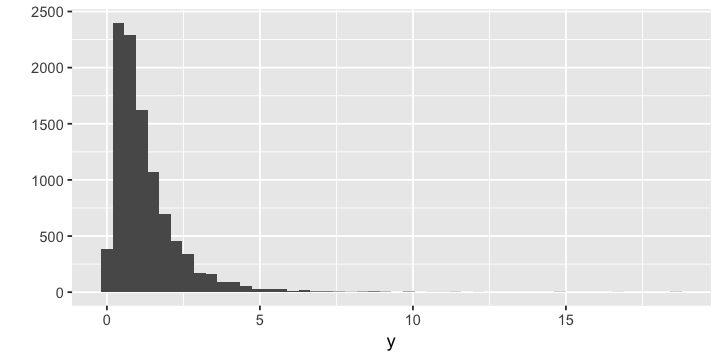

In [49]:
n_obs = 10000
k = 5
m = 10

x1 = rnorm(n_obs*k)
x1 = matrix(x1, n_obs, k)
x1 = rowSums(x1**2)/k

x2 = rnorm(n_obs*m)
x2 = matrix(x2, n_obs, m)
x2 = rowSums(x2**2)/m

y = x1/x2
qplot(y, bins=50)

Снова внутри `R` уже есть готовая реализация $F(k,m)$.

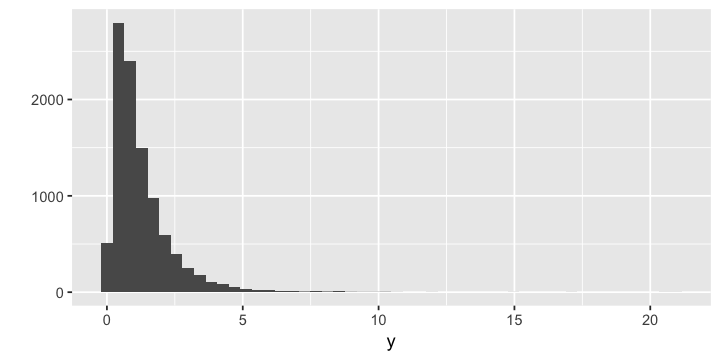

In [51]:
y = rf(n_obs, df1=5, df2=10)
qplot(y, bins=50)

Снова посмотрим как меняется плотность при изменении степеней свободы. 

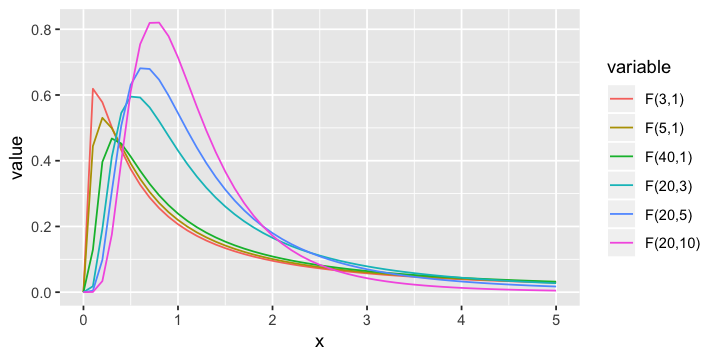

In [53]:
x = seq(0, 5, 0.1)

df = data.frame(x)

k = c(3, 5, 40, 20, 20, 20)
m = c(1, 1, 1, 3, 5, 10)

for(i in 1:length(k)){
    col = paste0("F(", k[i], ",", m[i], ")")
    df[col] = df(x, df1=k[i], df2=m[i])
}

df_long = melt(df, id="x")  # конвертировать в длинный формат

ggplot(data = df_long,
       aes(x=x, y=value, colour=variable)) + 
    geom_line()

__Когда такая штука встречается на практике?__  Рано или поздно мы захотим сравнивать дисперсии. Там-то и вылезет распределение Фишера. 

# 3. Тяжёлые хвосты 

Давайте нарисуем на одной картинке $N(0,1)$ и $t(1)$ распределения. 

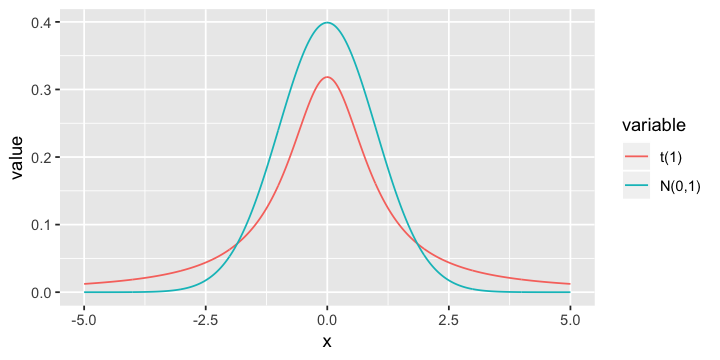

In [56]:
x = seq(-5, 5, 0.01)

df = data.frame(x)
df["t(1)"] = dt(x, df=1)
df["N(0,1)"] = dnorm(x)

df_long = melt(df, id="x")

ggplot(data = df_long,
      aes(x = x, y = value, colour=variable)) + 
    geom_line()

Посмотрите на эти две плотности. У красной хвосты лежат выше, чем у синей. Хвосты $t(1)$ тяжелее $N(0,1)$. Под ними находится большая вероятностная масса. Такие хвосты называются толстыми. Вероятность того, что очень большое, аномальное значение случайной величины, вывалится из распределения с толстым хвостом, выше. 

In [4]:
# P(t(1) > 10)
n_obs = 10**7
x = rt(n_obs, df=1)
mean(x > 10)

[1] 0.0316483

In [3]:
1 - pt(10, df=1)

[1] 0.03172552

In [5]:
# P(N(0,1) > 10)
x = rnorm(n_obs)
mean(x > 10)

[1] 0

In [61]:
1 - pnorm(10)

[1] 0

Главная проблема заключается в том, что по сравнению с количеством наблюдений из серцевины распределения, число наблюдений из хвостов, ничтожно мало. Из-за этого их постоянно недооценивают. __В статистике есть даже отдельные методы по работе с хвостами.__ 

Обычно проблема тяжёлых хвостов выскакивает в финансах. У нас в выборке оказывается довольно мало примеров из области хвостов, потому что они редко порождаются данными. Из-за маленького числа наблюдений из хвостов, мы не можем адекватно оценить что в них происходит и занижаем вероятности оказаться в них. Представим себе следующий сценарий развития событий: 

Мы собрали данные по акции 

@@@@@@@@@@@@@

Мы построили распределение её доходностей как нормальное

@@@@@@@@@@@@@

В выборке оказалось мало примеров с очень мальнькой доходностью, поэтому мы случайно занизили вероятность маленьких доходностей. 

@@@@@@@@@@@@@

Мы ожидаем на основе моделей, что маленькие доходности будут в $5\%$ случаев. 

@@@@@@@@@@@@@

Они возникают чаше, потому что хвосты на самом деле толще. Насколько они толще мы не знаем. Мало данных. 

@@@@@@@@@@@@@

Мы терпим потери.

@@@@@@@@@@@@@

fuuuuuuuuuuuu

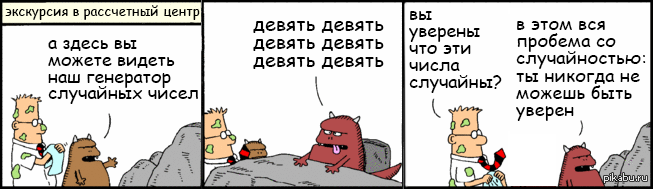